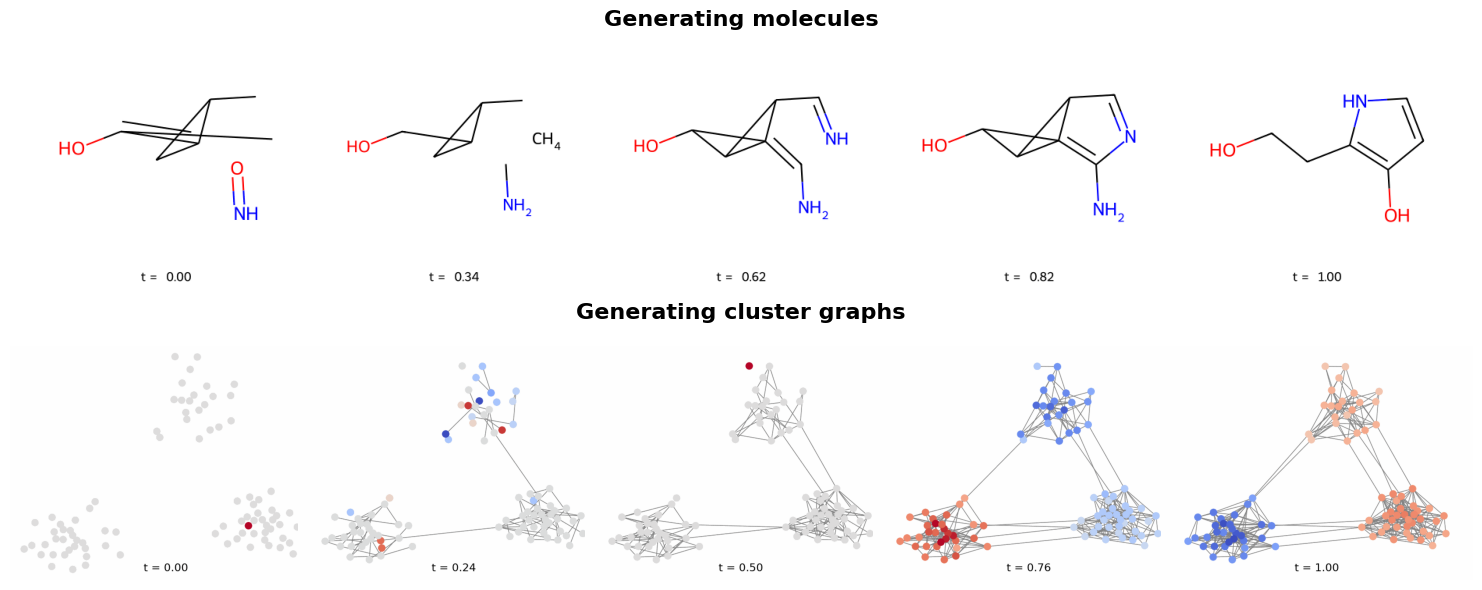

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def extract_frames(gif_path, k=5):
    im = Image.open(gif_path)
    n = getattr(im, "n_frames", 1)
    indices = [round(i * (n - 1) / (k - 1)) for i in range(k)]
    frames = []
    for idx in indices:
        im.seek(idx)
        frame = im.convert("RGB")
        frames.append(np.array(frame))
    return frames

gif1 = "qm9_molecule_4.gif"
gif2 = "sbm_molecule_14.gif"

frames1 = extract_frames(gif1, k=5)
frames2 = extract_frames(gif2, k=5)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Row 1 - molecules
for i, ax in enumerate(axes[0]):
    ax.imshow(frames1[i])
    ax.axis("off")
axes[0, 2].set_title("Generating molecules", fontsize=16, weight="bold", pad=20)

# add some distance between rows
plt.subplots_adjust(hspace=2.0)

# Row 2 - cluster graphs
for i, ax in enumerate(axes[1]):
    ax.imshow(frames2[i])
    ax.axis("off")
axes[1, 2].set_title("Generating cluster graphs", fontsize=16, weight="bold", pad=20)

plt.tight_layout()
plt.savefig("contact_sheet_matplotlib.png", dpi=200)
plt.show()
